## Redes Neurais 

### Introdução

As redes neurais são sistemas computacionais inspirados no funcionamento do cérebro humano, capazes de aprender padrões a partir de exemplos e de generalizá-los para novas situações. Um dos primeiros modelos que ajudou a popularizar esse campo foi o perceptron, introduzido por Frank Rosenblatt na década de 1950. O perceptron consiste em uma unidade de processamento que recebe entradas, as pondera por meio de pesos e, em seguida, produz uma saída binária, sendo capaz de realizar tarefas de classificação simples. Embora esse modelo seja relativamente limitado, ele abriu caminho para o desenvolvimento de arquiteturas neurais mais complexas que hoje impulsionam áreas como visão computacional, processamento de linguagem natural e tomada de decisão autônoma.

<img src="../imgs/perceptron.png" width=600>

Após um período de ceticismo e redução de investimentos durante o chamado “inverno da IA” na década de 1990, as redes neurais ressurgiram graças a avanços tecnológicos e teóricos que impulsionaram seu desempenho. O aumento da capacidade de processamento, sobretudo com o uso de GPUs, e a disponibilidade crescente de grandes volumes de dados criaram um ambiente favorável para que algoritmos de aprendizado profundo (deep learning) prosperassem. Nesse contexto, arquiteturas neurais mais complexas e eficientes começaram a demonstrar resultados surpreendentes em tarefas como reconhecimento de imagens, processamento de linguagem natural e tomada de decisão, marcando o fim do inverno e inaugurando uma nova era para a Inteligência Artificial.

### Multi-layer Perceptron (MLP)

A MLP é uma arquitetura simples na qual se utiliza a ideia da perceptron citada anteriormente. A diferença é que, ao invés de uma única camada de neurônios, a MLP possui múltiplas camadas, sendo a primeira a camada de entrada, a última a camada de saída e as intermediárias camadas ocultas. Cada neurônio em uma camada oculta recebe como entrada a saída de todos os neurônios da camada anterior, ponderada por pesos. A saída de cada neurônio é então passada por uma função de ativação, que introduz não-linearidades no modelo e permite que a rede aprenda padrões mais complexos.

<img src="../imgs/mlp.png" width=600>

### Aplicação 

Vamos testar o poder das MLPs em aprender padrões com um caso simples! Para isso, vamos modelar uma reta que separa dois conjuntos de pontos em um plano 2D. A ideia é que a rede aprenda a classificar esses pontos em duas categorias distintas, separadas pela reta.

Vamos começar criando uma função com a qual queremos que a nossa rede aprenda a separar os pontos. A função é dada por:

$$
f(x) = ax + b
$$

onde $a$ e $b$ são parâmetros que definem a reta. Os dois parâmetros estão definidos no arquivo `magic.py`. Vamos importar esses parâmetros e plotar a função.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from magic import a, b

np.random.seed(42)

X = np.linspace(0, 10, 2000)
y = a * X + b + np.random.normal(0, 1, 2000)

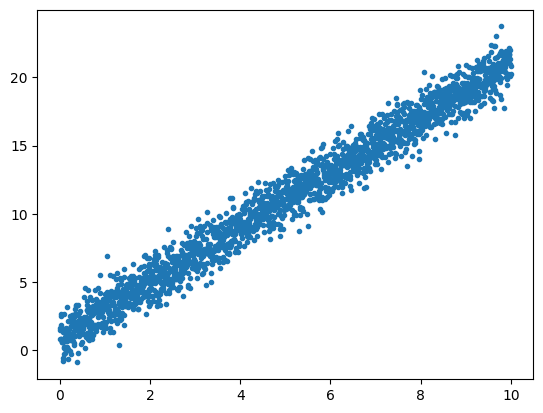

In [130]:
plt.plot(X, y, '.')

## Implementação

Agora, sem "enxergar" os valores de $a$ e $b$, vamos treinar uma MLP para aprender a separar os pontos em duas categorias distintas. Para isso, vamos utilizar a biblioteca `tensorflow` para criar a rede neural e treiná-la.

In [136]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

np.random.seed(42)

model = keras.Sequential([
    keras.layers.Dense(1, input_shape=[1]),
])

model.compile(optimizer=keras.optimizers.SGD(0.01), 
              loss="mse")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

history = model.fit(X_train, 
                    y_train, 
                    epochs=20, 
                    validation_split=0.2)

Epoch 1/20
 1/40 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 19.0541

c:\Users\gabri\Documents\millai\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2267 - val_loss: 1.0584
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1403 - val_loss: 1.0190
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0850 - val_loss: 0.9935
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0401 - val_loss: 1.0237
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0702 - val_loss: 0.9668
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0080 - val_loss: 1.0143
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9963 - val_loss: 0.9610
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9303 - val_loss: 0.9519
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9755 - val_loss: 0.9490
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9441 - val_loss: 0.9615
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9895 - val_loss: 0.9480
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0286 - val_loss: 0.9603


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


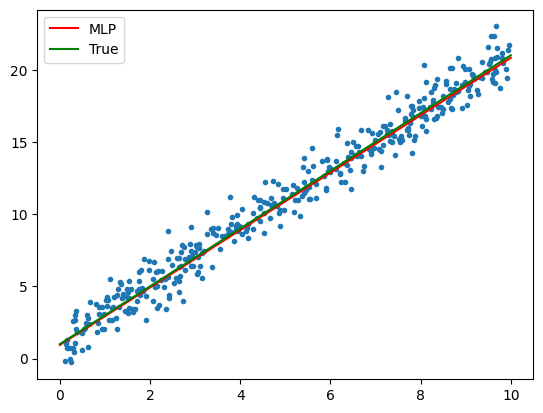

In [139]:
plt.plot(X_test, y_test, '.')
plt.plot([0.0, 10.0], [model.predict(np.array([0.0]))[0][0], model.predict(np.array([10.0]))[0][0]], 'r-', label="MLP")
plt.plot([0.0, 10.0], [b, a*10+b], 'g-', label="True")
plt.legend()
plt.show()

In [144]:
model.get_weights()

a_pred = model.get_weights()[0][0][0]
b_pred = model.get_weights()[1][0]

print(f"True: a = {a}, b = {b}")
print(f"MLP: a = {a_pred:.3f}, b = {b_pred:.3f}")

True: a = 2, b = 1
MLP: a = 1.988, b = 0.946
